<a href="https://colab.research.google.com/github/KamiraPagulayan/CCDATSCL_EXAM_COM221/blob/main/MIDTERM_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [161]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
Path to dataset files: /kaggle/input/hotel-booking-demand


In [162]:
import os
import pandas as pd

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

In [163]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [164]:
mean_adr = df['adr'].mean()
median_adr = df['adr'].median()
mode_lt = df['lead_time'].mode()[0]
print(f"Mean: {mean_adr}")
print(f"Median: {median_adr}")
print(f"Mode: {mode_lt}")

Mean: 101.83112153446686
Median: 94.575
Mode: 0


In [165]:
mean_lt = df['lead_time'].mean()
median_lt = df['lead_time'].median()
mode_adr = df['adr'].mode()[0]
print(f"Mean: {mean_lt}")
print(f"Median: {median_lt}")
print(f"Mode: {mode_adr}")

Mean: 104.01141636652986
Median: 69.0
Mode: 62.0


In [166]:
df[['lead_time', 'adr']].describe()

,lead_time,adr
count,119390.000000,119390.000000
mean,104.011416,101.831122
std,106.863097,50.535790
min,0.000000,-6.380000
25%,18.000000,69.290000
50%,69.000000,94.575000
75%,160.000000,126.000000
max,737.000000,5400.000000


In [167]:
print(f"Mode Lead Time: {df['lead_time'].mode()[0]}")
print(f"Mode ADR: {df['adr'].mode()[0]}")

Mode Lead Time: 0
Mode ADR: 62.0


<Axes: title={'center': 'Distribution of Lead Time'}, ylabel='Frequency'>

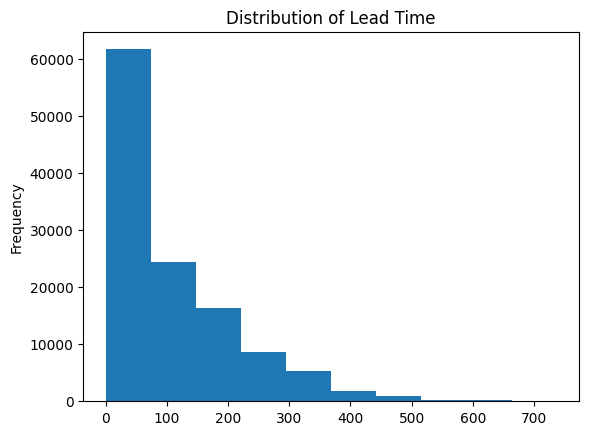

In [168]:
df['lead_time'].plot.hist(column = 'lead_time', title = 'Distribution of Lead Time')

<Axes: >

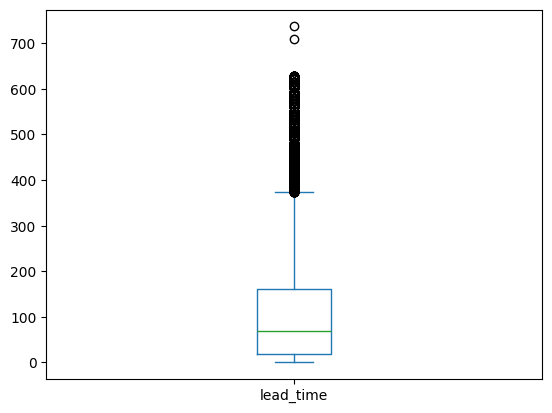

In [169]:
df['lead_time'].plot.box()

<Axes: title={'center': 'Distribution of ADR'}, ylabel='Frequency'>

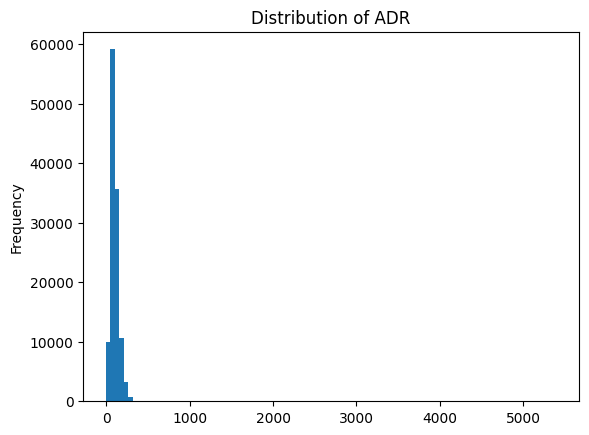

In [170]:
df['adr'].plot.hist(title = 'Distribution of ADR', bins=100)

<Axes: title={'center': 'Distribution of ADR'}>

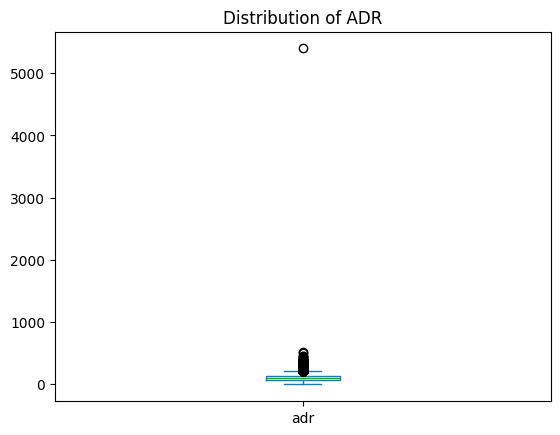

In [171]:
df['adr'].plot.box(title = 'Distribution of ADR')

In [172]:
df[['lead_time', 'adr']].kurtosis()

,0
lead_time,1.696449
adr,1013.189851


In [189]:
df[['lead_time', 'adr']].skew()

,0
lead_time,1.346550
adr,10.530214


***Question: What do the shapes and spread of the lead_time and adr distributions suggest about typical booking behavior and extreme cases in this dataset?***

Lead Time and Average Daily Rate (ADR) both have right skewed positive or leptokurtic distributions, with a high concentration of values around the mean. The majority of customers reserve lodging close to their planned arrival, but some very infrequently, but very irregularly, will reserve lodging up to a year or longer in advance, which creates a long right tail. ADR values are mostly around 100–150, but a small number of very high-priced bookings (up to around 5400) cause outliers.

## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



In [174]:
df[['lead_time', 'is_canceled']].describe()

,lead_time,is_canceled
count,119390.000000,119390.000000
mean,104.011416,0.370416
std,106.863097,0.482918
min,0.000000,0.000000
25%,18.000000,0.000000
50%,69.000000,0.000000
75%,160.000000,1.000000
max,737.000000,1.000000


In [175]:
df.groupby('is_canceled')['lead_time'].describe()

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,75166.0,79.984687,91.109888,0.0,9.0,45.0,124.0,737.0
1,44224.0,144.848815,118.624829,0.0,48.0,113.0,214.0,629.0


array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

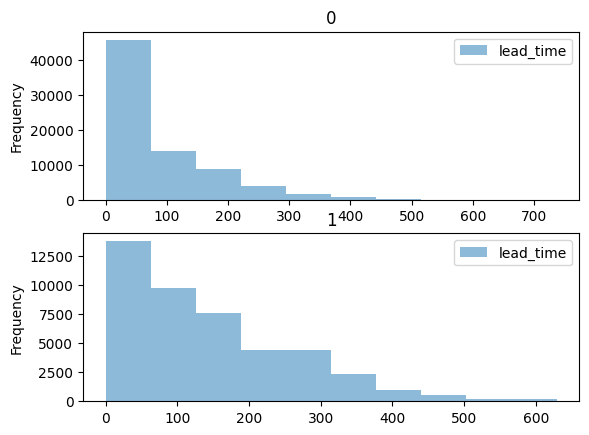

In [176]:
df.plot.hist(column = 'lead_time', by = 'is_canceled', stacked = True, alpha = 0.5)

,0
lead_time,"Axes(0.125,0.11;0.775x0.77)"


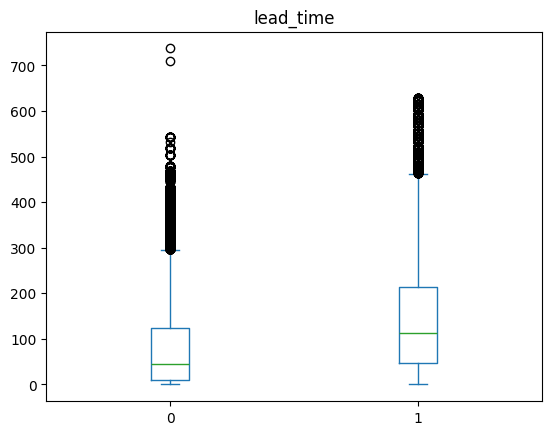

In [177]:
df.plot.box(column = 'lead_time', by = 'is_canceled')

***Question: Do bookings with longer lead times tend to cancel more often?***

Higher average lead times for canceled bookings compared to the non-canceled bookings indicate that, on average, customers tend to book more in advance before canceling their reservation. With more advanced booking, customers have greater flexibility and more time to alter any plans that may arise that would increase their risk of cancellation.

## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

In [178]:
df.groupby(['arrival_date_month','hotel']).agg(
    Mean_ADR = ('adr', 'mean'),
    Median_ADR = ('adr', 'median'),
    Total_Count = ('hotel', 'count')
)

Mean_ADR  Median_ADR  Total_Count
arrival_date_month hotel                                            
April              City Hotel    111.251838     105.000         7480
                   Resort Hotel   77.849496      75.000         3609
August             City Hotel    114.680455     109.000         8983
                   Resort Hotel  186.790574     188.420         4894
December           City Hotel     88.826307      85.000         4132
                   Resort Hotel   68.984230      57.865         2648
February           City Hotel     85.088278      80.000         4965
                   Resort Hotel   55.171930      51.000         3103
January            City Hotel     82.628986      80.000         3736
                   Resort Hotel   49.461883      47.600         2193
July               City Hotel    110.734292     107.100         8088
                   Resort Hotel  155.181299     152.500         4573
June               City Hotel    119.074341     117.370         7894
                   Resort Hotel  110.444749     105.000         3045
March              City Hotel     92.643116      88.000         6458
                   Resort Hotel   57.520147      55.600         3336
May                City Hotel    121.638560     120.000         8232
                   Resort Hotel   78.758134      73.000         3559
November           City Hotel     88.069601      85.000         4357
                   Resort Hotel   48.273993      45.000         2437
October            City Hotel     99.974498      99.870         7605
                   Resort Hotel   62.097617      58.000         3555
September          City Hotel    110.004661     107.000         7400
                   Resort Hotel   93.252030      86.000         3108

In [179]:
df.groupby('hotel').agg(
    Mean_ADR = ('adr', 'mean'),
    Median_ADR = ('adr', 'median')
)

,Mean_ADR,Median_ADR
hotel,,
City Hotel,105.304465,99.9
Resort Hotel,94.952930,75.0


***Question: Do Resort Hotels and City Hotels exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?***

In the months of July and August, resort hotels enjoy a peak season and thus obtain the highest average daily rate (ADR). The average daily rate for city hotels tends to be higher than resort hotel ADRs outside of summer; however, the month of June has a slightly higher average daily rate than any of the other non-summer months as the transition into summer begins.

## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


In [180]:
df.groupby('is_repeated_guest').agg(
    Total_Cancels = ('is_canceled', 'sum'),
    Total_Count = ('is_canceled', 'count'),
    Mean_Lead_Time = ('lead_time', 'mean'),
    Median_Lead_Time = ('lead_time', 'median'),
)

,Total_Cancels,Total_Count,Mean_Lead_Time,Median_Lead_Time
is_repeated_guest,,,,
0,43672,115580,106.425221,72.0
1,552,3810,30.786352,3.0


In [181]:
print(f'Non-repeating guests % Cancellation: {43672/115580}')
print(f'Repeating guests % Cancellation: {552/3810}')

Non-repeating guests % Cancellation: 0.3778508392455442
Repeating guests % Cancellation: 0.14488188976377953


***Question: Do repeated guests behave differently from first-time guests?***

Booking for repeat guests generally occurs one month before arrival, while booking for non-repeat guests generally occurs 2-3 months before arrival. Repeat guest cancellations average 14.48%, while for non-repeat guests, the cancellation rate is 37.78%.

## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


In [182]:
categorical = df.select_dtypes('object')
numerical = df.select_dtypes('number')
categorical.drop(columns = 'reservation_status_date', inplace=True)
print(len(categorical.columns))
print(len(numerical.columns))

11
20


In [183]:
df = pd.get_dummies(df, columns=categorical.columns)

In [184]:
df.drop(columns = 'reservation_status_date', inplace=True)

In [185]:
df.corr()[['is_canceled', 'reservation_status_Canceled']].sort_values(ascending=False, by='is_canceled').head(10)

,is_canceled,reservation_status_Canceled
is_canceled,1.000000,0.978435
reservation_status_Canceled,0.978435,1.000000
deposit_type_Non Refund,0.481457,0.490337
country_PRT,0.336122,0.328450
lead_time,0.293123,0.304077
market_segment_Groups,0.221859,0.229088
assigned_room_type_A,0.197187,0.199594
distribution_channel_TA/TO,0.175944,0.181766
hotel_City Hotel,0.136531,0.133123
customer_type_Transient,0.133084,0.131810


In [186]:
df.corr()[['is_canceled', 'reservation_status_Canceled']].sort_values(ascending=False, by='is_canceled').tail(10)

,is_canceled,reservation_status_Canceled
customer_type_Transient-Party,-0.124135,-0.123411
assigned_room_type_D,-0.128036,-0.128961
hotel_Resort Hotel,-0.136531,-0.133123
booking_changes,-0.144381,-0.145608
distribution_channel_Direct,-0.151620,-0.156712
market_segment_Direct,-0.154390,-0.160099
required_car_parking_spaces,-0.195498,-0.191282
total_of_special_requests,-0.234658,-0.235013
deposit_type_No Deposit,-0.477911,-0.486775
reservation_status_Check-Out,-1.000000,-0.978435


In [187]:
df.corr()[['is_canceled', 'reservation_status_Canceled']].abs().sort_values(ascending=False, by='is_canceled').head(10)

,is_canceled,reservation_status_Canceled
is_canceled,1.000000,0.978435
reservation_status_Check-Out,1.000000,0.978435
reservation_status_Canceled,0.978435,1.000000
deposit_type_Non Refund,0.481457,0.490337
deposit_type_No Deposit,0.477911,0.486775
country_PRT,0.336122,0.328450
lead_time,0.293123,0.304077
total_of_special_requests,0.234658,0.235013
market_segment_Groups,0.221859,0.229088
assigned_room_type_A,0.197187,0.199594


***Question: Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?***

From a correlation analysis we can see that "deposit type", "lead time" and "total number of special requests" are the three most significant causes of canceled bookings. The strongest correlations (~0.48) exist between cancellations and nonrefundable/non-deposit bookings, indicating that these two variables greatly impact the likelihood of a booking being canceled.